# Task: Deep neural networks

This notebook explores the application of **Perceptrons** and **Multi-Layer Perceptrons** (**MLPs**) to classify the *Fashion-MNIST* dataset. Tasks include evaluating model performance, experimenting with architecture variations, and visualizing results.

### Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron as Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Load and Visualize the Dataset

Here's the loading of the Fashion-MNIST dataset, which consists of $70,000$ grayscale images of clothing, each labeled into one of $10$ categories.

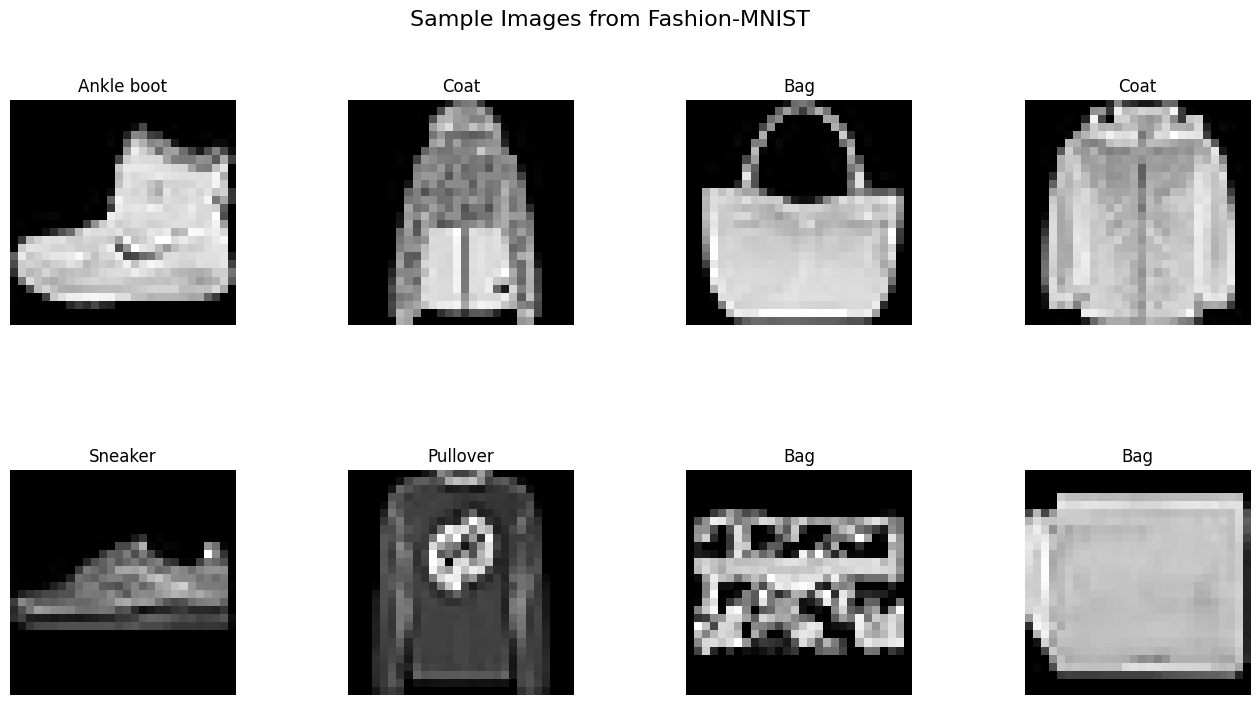

In [3]:
# Load data from OpenML
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Visualize a few random samples
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

fig, ax = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax = ax.flatten()

for i, idx in enumerate(index):
    ax[i].imshow(np.reshape(X[idx], (28, 28)), cmap='gray')
    ax[i].set_title(text_labels[int(y[idx])], fontsize=12)
    ax[i].axis('off')

plt.suptitle("Sample Images from Fashion-MNIST", fontsize=16)
plt.show()

### Data Manipulation

The dataset is splitted into training and testing sets and the pixel values are scaled for better optimization performance.

In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Task 1: Train a Perceptron



### 1. Implementation and Training of the Perceptron

The **Perceptron** is a well-known and simple linear classifier. It has been training with the standardized Fachion-MNIST data.

In [6]:
# Train the Perceptron
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

### 2. Printing the Accuracy

In [8]:
# Calculate and print accuracy
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy:.4f}")

Perceptron Accuracy: 0.8166


### 3. Discussing the Result

The Perceptron Accuracy, which is $81.66\%$, seems like a good starting point for a first training, considering the fact that it is a linear classifier. Although, the result could be improved afterwards, maybe with some regularization, data augmentation, feature engineering and any other technique that could help the model to generalize the data.

### 4. Example of Incorrect Classification

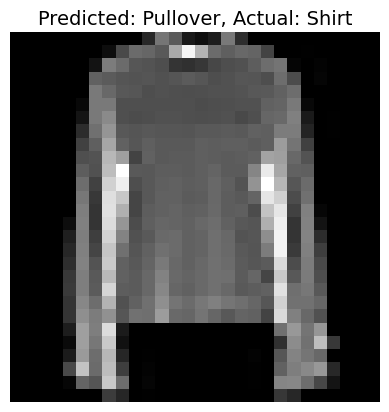

In [10]:
# Visualize an incorrect classification
incorrect_index = np.where(y_pred != y_test)[0][0]  # Find an incorrect sample

# Rescale the image using the unscaled original data)
X_test_rescaled = scaler.inverse_transform(X_test)

# Display the rescaled image
plt.imshow(np.reshape(X_test_rescaled[incorrect_index], (28, 28)), cmap='gray')
plt.title(
    f"Predicted: {text_labels[int(y_pred[incorrect_index])]}, "
    f"Actual: {text_labels[int(y_test[incorrect_index])]}",
    fontsize=14
)
plt.axis('off')
plt.show()

The displayed image was miscassified as a `Pullover`, but actually it was a `Shirt`. The misclassification seems legitimate, as the image is unclear and easily interchangeable, as Pullovers and Shirts are two types of clothing that can sometimes be interchanged. Therefore, this type of misclassification does not appear to be completely out of the ordinary, as it kind of look like the digit that was predicted.

### 5. Discussing multi-class perceptron

In a multi-class scenario, a Perceptron would train a binary classifier for each class (one-vs-rest approach).
This means that there would be the creation of separate binary classifiers, each determining if the current class is the target class or not.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)


### Multi-layer Perceptron's definition and training

In [11]:
# Defining and training the MLP
mlp = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.1, random_state=1, verbose=1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.63982681
Iteration 2, loss = 0.43309333
Iteration 3, loss = 0.39753066
Iteration 4, loss = 0.37727725
Iteration 5, loss = 0.36473861
Iteration 6, loss = 0.35406314
Iteration 7, loss = 0.34652351
Iteration 8, loss = 0.34180317
Iteration 9, loss = 0.33441681
Iteration 10, loss = 0.33036474
Iteration 11, loss = 0.32661593
Iteration 12, loss = 0.32187934
Iteration 13, loss = 0.31980492
Iteration 14, loss = 0.31658098
Iteration 15, loss = 0.31249897
Iteration 16, loss = 0.31143816
Iteration 17, loss = 0.30885581
Iteration 18, loss = 0.30687183
Iteration 19, loss = 0.30333655
Iteration 20, loss = 0.30351777
Iteration 21, loss = 0.30051948
Iteration 22, loss = 0.29833242
Iteration 23, loss = 0.29844625
Iteration 24, loss = 0.29638867
Iteration 25, loss = 0.29463795
Iteration 26, loss = 0.29338758
Iteration 27, loss = 0.29279986
Iteration 28, loss = 0.29166540
Iteration 29, loss = 0.29030085
Iteration 30, loss = 0.28960588
Iteration 31, loss = 0.28718995
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), random_state=1, verbose=1)

### Training and Testing accuracy

In [12]:
# Accuracy score
train_accuracy = accuracy_score(y_train, mlp.predict(X_train))
test_accuracy = accuracy_score(y_test, mlp.predict(X_test))
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9264
Test Accuracy: 0.8698


### Questions
1. The input layer size is $784$ because each image is $28x28$ pixels, and it is flatten into a $784$-dimensional vector.
2. The output layer size is $10$, representing the $10$ classes of Fashion-MNIST.
3. To calculate the total weights, there's the need to multiply the number of connections between each layer:
    - From input to hidden: $784 x 20$
    - From hidden to output: $20 x 10$
4. The difference between training and testing accuracy suggests overfitting or underfitting. The training accuracy is higher, so it is implying that the model is overfitting the training data, meaning that the model memorized too well the training data with less generalization of unseen data.


### Wider, wider, wider

In [13]:
# Experimenting with different widths
widths = (20, 50, 100, 200)
a_train = []
a_test = []

for width in widths:
    mlp = MLPClassifier(hidden_layer_sizes=(width,), alpha=0.001, random_state=42)
    mlp.fit(X_train, y_train)
    a_train.append(accuracy_score(y_train, mlp.predict(X_train)))
    a_test.append(accuracy_score(y_test, mlp.predict(X_test)))

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


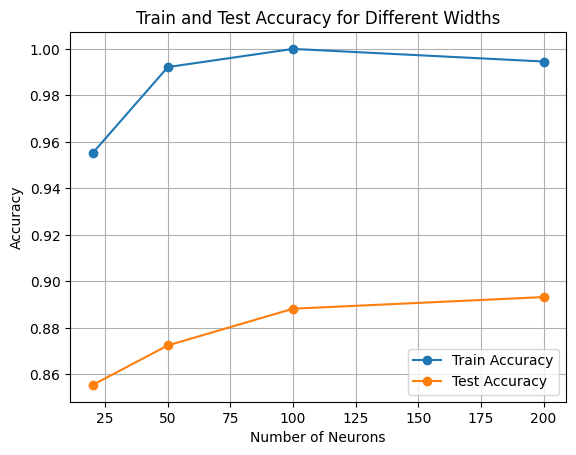

In [14]:
# Plot training and test accuracy
plt.plot(widths, a_train, label="Train Accuracy", marker='o')
plt.plot(widths, a_test, label="Test Accuracy", marker='o')
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy for Different Widths")
plt.legend()
plt.grid(True)
plt.show()

### Questions

1. Training time increased as the number of neurons in the hidden layer grew. In fact, the total training time was aroun $9m30s$ long. This is expected because a wider hidden layer means the model has more parameters (weights and biases) to update during training. For example, a hidden layer with $20$ neurons trains faster than one with $200$ neurons because there are fewer weights to compute. Also, the increased time is particularly noticeable for large widths, where the training may also be slower due to potential overfitting, as the network learns too well patterns in the data.

2. From the graph, the performance improves as the number of neurons in the hidden layer increases, but the gain diminishes after a certain point. For example, a hidden layer with $50$ neurons achieves almost the same test accuracy as one with $100$ neurons, suggesting that it could bring a better performance in terms of complexity with almost the same accuracy return. So, the best balance between performance and complexity could be with $50$ neurons in the hidden layer. For the optimal solution (50 neurons), the algorithm learns:
    - From input to hidden layer: $784 × 50 = 39,200$ weights
    - From hidden to output layer: $50 × 10 = 500$ weights.
    - Total: $39,700$ weights.
    This number of weights represents the parameters the model optimizes during training.

    There is some evidence of overfitting for the larger hidden layers, like $100$ and $200$, because the training accuracy is much higher than the testing one. This indicates that the model memorizes the training data but struggles to generalize to unseen samples, as mentioned previously.
    To mitigate overfitting, some important techniques could be used, such as:
    - **Regularization**: Increase the `alpha` parameter for regularization to penalize large weights, helping the reduce overfitting.
    - **Early Stopping**: It consists of a monitor for validation accuracy during training, stopping the performance when it stops improving.
    - **Dropout**: They are some layers that randomly deactivate a fraction of neurons during training, preventing the network from becoming too addicted to specific patterns.
    - **Reduce Width**: Limit the number of neurons in the hidden layer to balance model capacity and generalization ability.

## Task 3: The deeper the better!


In [15]:
# Experiment with deeper networks
layers = ((20, 20), (20, 20, 20), (50, 20), (100, 100, 50))
a_train = []
a_test = []

for layer in layers:
    mlp = MLPClassifier(hidden_layer_sizes=layer, alpha=0.001, random_state=42)
    mlp.fit(X_train, y_train)
    a_train.append(accuracy_score(y_train, mlp.predict(X_train)))
    a_test.append(accuracy_score(y_test, mlp.predict(X_test)))

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


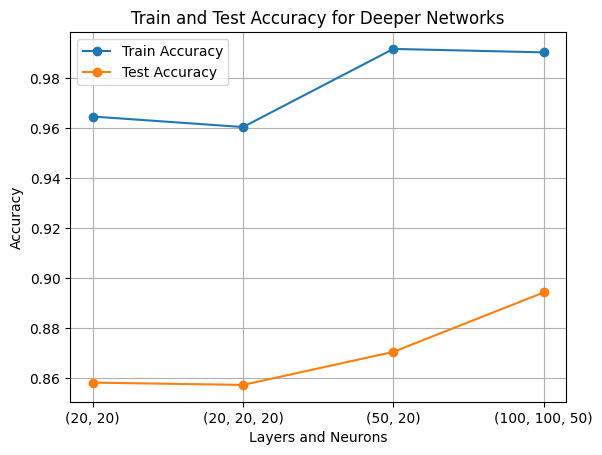

In [16]:
# Plot training and test accuracy for deeper networks
plt.plot([str(layer) for layer in layers], a_train, label="Train Accuracy", marker='o')
plt.plot([str(layer) for layer in layers], a_test, label="Test Accuracy", marker='o')
plt.xlabel("Layers and Neurons")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy for Deeper Networks")
plt.legend()
plt.grid(True)
plt.show()

### Questions

The graph shows that deeper networks with fewer neurons per layer can sometimes outperform a very wide single-layer network. For example, a network with three layers ($100, 100, 50$) has a good performance in terms of both accuracy and time-complexity, comparing to a single layer with $200$ neurons, for instance, that is able to reach a very good accuracy, but in a longer time of training. This highlights the importance of network depth in capturing complex patterns in the data, as deeper architectures can represent hierarchical features more effectively.

Both solutions performed very well, but the main difference is in the **weight** calculation:

- The single layer with $200$ neurons had to train $784x200=156,800$ parameters as an input to hidden layer, and $200x10=2,000$ parameters as an hidden to output layer, so $158,800$ as total weights.
- The deeper network with three layers ($100,100,50$) had to train $784x100=78,400$ parameters as an input to first hidden layer, $100x100=10,000$ parameters as a first to second hidden layer, $100x50=5,000$ parameters as a second to third hidden layer and $50x10=500$ as a third to output layer, so $93,900$ as total weights. 

Those results lead to the conclusion that the deeper network ($93,900$ weights) requires significantly fewer parameters than the wide network ($158,800$ weights), making it more efficient in terms of memory and computational cost. So, both solutions reached almost the same performance, but the deeper network was able to train the model by using fewer parameters and time. 
Also, the deeper network uses its layers to extract hierarchical features progressively, which leads to better generalization. On the other hand, the wide network attempts to learn all features in a single step, which can lead to overfitting or insufficient learning of complex patterns.

## Task 4: Confusion matrix


In [17]:
best_mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 50), alpha=0.001, random_state=42)
best_mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 50), random_state=42)

In [18]:
# Predict using the trained MLP
y_pred_mlp = best_mlp.predict(X_test)

# Evaluate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp:.4f}")

MLP Accuracy: 0.8943


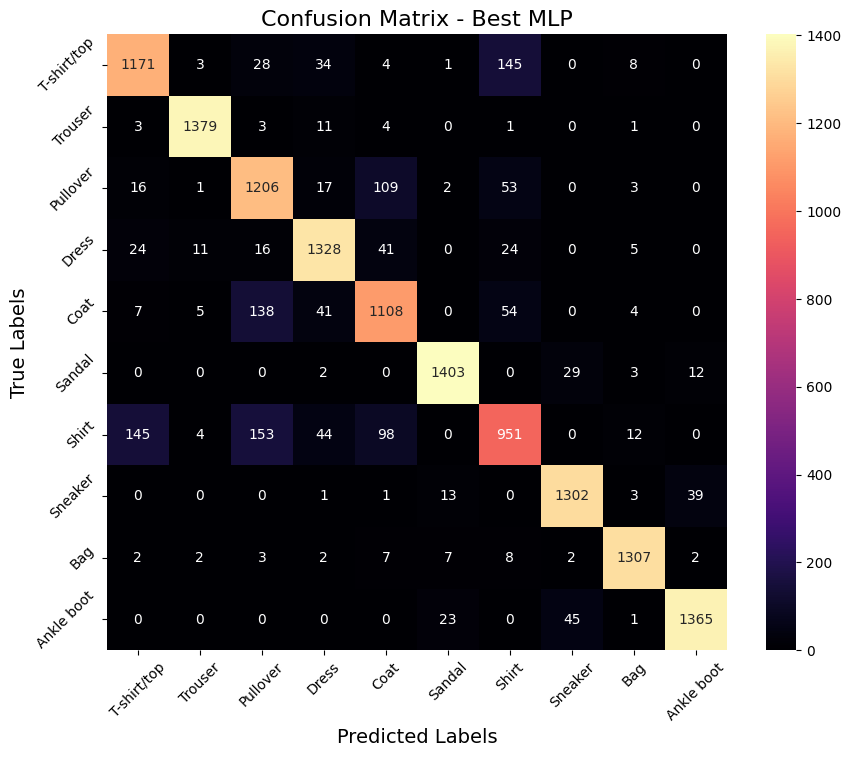

In [19]:
# Generate the confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="magma", xticklabels=text_labels, yticklabels=text_labels)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix - Best MLP", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Description

The confusion matrix shows the performance of the MLP model with three layers ($100, 100, 50$ neurons) on the test dataset. Each entry in the matrix reflects the model's predictions for specific classes, providing insight into areas where the model performs well and where it struggles.

The diagonal values represent **correct classifications**, with each cell corresponding to a particular class. For example, the model correctly classified $1,171$ T-shirts/Tops as T-shirts/Tops, $1,379$ Trousers as Trousers, and $1,403$ Sandals as Sandals. These high values along the diagonal indicate strong classification performance for most categories. Notably, classes like Trousers, Sandals, and Ankle Boots demonstrate exceptionally accurate predictions, with almost no misclassifications. This suggests that the model has successfully learned to distinguish these classes, likely due to their distinct and non-overlapping features.

However, the off-diagonal values, which indicate misclassifications, reveal areas of confusion. A noticeable trend is the model's difficulty in differentiating between visually similar classes. For instance, $145$ T-shirts/Tops were misclassified as Shirts, and $153$ Pullovers were identified as Shirts. This confusion could be from the overlapping features or textures shared by these clothing items, such as similar shapes or patterns in the data. Similarly, there is some ambiguity between Pullovers and Coats, as evidenced by $138$ Pullovers being misclassified as Coats. These misclassifications highlight the challenge of distinguishing between classes that have little feature differences.

Another observation is the imbalance in misclassifications across classes. While some categories, such as Bags and Ankle Boots, are classified with near-perfect accuracy, others like Shirts and Pullovers show higher rates of misclassification. This could be explained by the fact that certain classe have more distinct features that are easier for the model to learn, while others may require additional training data to improve generalization.

All things considered, the confusion matrix shows that the model is solid, with the majority of predictions aligning correctly. The high accuracy for several classes indicates effective generalization to unseen test data. However, the areas of confusion also suggest potential overfitting to features that may not generalize well across similar classes. To address this, techniques such as augmenting the dataset, fine-tuning hyperparameters, or incorporating additional layers could be considered to further improve performance.